# Dealing with Missing Data - Lab

## Introduction

In this lab, we'll work through strategies for data cleaning and dealing with missing values (`NaN`s).

## Objectives
In this lab you will:

- Identify missing values in a dataframe using built-in methods 
- Explain why missing values are a problem in data science 

## Dataset

In this lab, we'll continue working with the _Titanic Survivors_ dataset, which can be found in `'titanic.csv'`.

Before we can get going, we'll need to import the usual libraries.  In the cell below, import:
* `pandas` as `pd`
* `numpy` as `np`
* `matplotlib.pyplot` as `plt`
* set `%matplotlib inline`

In [1]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's get started by reading in the data from the `'titanic.csv'` file and storing it the DataFrame `df`. Subsequently, be sure to preview the data.

In [2]:
# Use pandas to load the csv file
df = pd.read_csv('titanic.csv', index_col=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Find missing values in a DataFrame

Before we can deal with missing values, we first need to find them. There are several easy ways to detect them.  We will start by answering very general questions, such as "does this DataFrame contain any null values?", and then narrowing our focus each time the answer to a question is "yes".

We'll start by checking to see if the DataFrame contains **any** missing values (NaNs) at all. 

**_Hint_**: If you do this correctly, it will require method chaining, and will return a boolean value for each column.  

In [3]:
# Your code here
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Now we know which columns contain missing values, but not how many. 

In the cell below, chain a different method with `isna()` to check how many total missing values are in each column.  

Expected Output:

```
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
```

In [4]:
# Your code here
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now that we know how many missing values exist in each column, we can make some decisions about how to deal with them.  

We'll deal with each column individually, and employ a different strategy for each.  


### Dropping the column

The first column we'll deal with is the `Cabin` column.  We'll begin by examining this column more closely. 


In the cell below:
* Determine what percentage of rows in this column contain missing values
* Print out the number of unique values in this column

In [5]:
# Your code here
# Percent of Missing Values in the Cabin column
percent_of_missing_values = df['Cabin'].isna().sum()/ len(df['Cabin'])
print(f'Percent of Missing Values in Cabin Column {percent_of_missing_values:.2%}')

Percent of Missing Values in Cabin Column 77.10%


In [20]:
# Number of Unique Values
len(df["Cabin"].unique())

148

In [6]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

With this many missing values, it's probably best for us to just drop this column completely.

In the cell below:

* Drop the `Cabin` column in place from the `df` DataFrame
* Then, check the remaining number of null values in the dataset by using the code you wrote previously   

In [7]:
# Your code here
df.drop(columns='Cabin', axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Computing placeholder values

Recall that another common strategy for dealing with missing values is to replace them with the mean or median for that column. We'll begin by investigating the current version of the `'Age'` column.  

In the cell below:

* Plot a histogram of values in the `'Age'` column with 80 bins (1 for each year)    
* Print out the mean and median for the column   

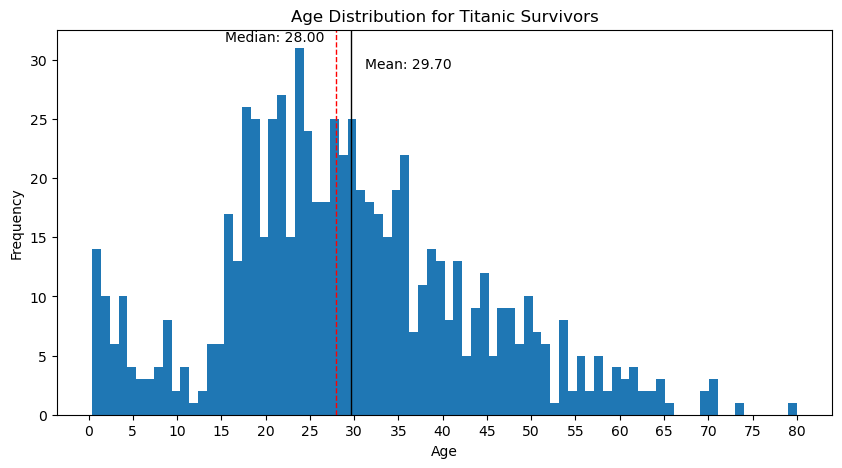

In [7]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 5))
x = df['Age']
tick_spacing = range(0,85,5)

ax.hist(x, bins=80)

ax.set_xticks(tick_spacing)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

#Plotting the Mean and Median Lines
plt.axvline(x.mean(), color='k', linestyle='-', linewidth=1)
plt.axvline(x.median(), color='r', linestyle='--', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.05, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.text(x.median()*0.55, max_ylim*0.97, 'Median: {:.2f}'.format(x.median()))

ax.set_title("Age Distribution for Titanic Survivors");

In [32]:
df['Age'].mean()

29.69911764705882

In [49]:
df['Age'].median()

28.0

From the visualization above, we can see the data has a slightly positive skew. 

In the cell below, replace all missing values in the `'Age'` column with the median of the column.  **Do not hard code this value -- use the methods from pandas or numpy to make this easier!**  Do this replacement in place on the DataFrame. 

In [8]:
# Your code here
df['Age'].fillna(df['Age'].median(), inplace=True)

Now that we've replaced the values in the `'Age'` column, let's confirm that they've been replaced.  

In the cell below, check how many null values remain in the dataset.  

In [9]:
# Your code here
df['Age'].isna().sum()

0

Great! Now we need to deal with the two pesky missing values in the `'Embarked'` column.  

### Dropping rows that contain missing values

Perhaps the most common solution to dealing with missing values is to simply drop any rows that contain them.  Of course, this is only a good idea if the number dropped does not constitute a significant portion of our dataset.  Often, you'll need to make the overall determination to see if dropping the values is an acceptable loss, or if it is a better idea to just drop an offending column (e.g. the `'Cabin'` column) or to impute placeholder values instead.

In the cell below, use the appropriate built-in DataFrame method to drop the rows containing missing values. Do this in place on the DataFrame.  

In [10]:
df = df.dropna(subset=['Embarked'])

In [11]:
df['Embarked'].isna().sum()

0

Great! We've dealt with all the **_obvious_** missing values, but we should also take some time to make sure that there aren't symbols or numbers included that are meant to denote a missing value. 

### Missing values with placeholders

A common thing to see when working with datasets is missing values denoted with a preassigned code or symbol.  Let's check to ensure that each categorical column contains only what we expect.

In the cell below, return the unique values in the `'Embarked'`, `'Sex'`, `'Pclass'`, and `'Survived'` columns to ensure that there are no values in there that we don't understand or can't account for.  

In [13]:
print("Unique Values in Embarked Column are: ", df['Embarked'].unique())
print("Unique Values in Sex Column are: ", df['Sex'].unique())
print("Unique Values in Pclass Column are: ", df['Pclass'].unique())
print("Unique Values in Survived Column are: ", df['Survived'].unique())

Unique Values in Embarked Column are:  ['S' 'C' 'Q']
Unique Values in Sex Column are:  ['male' 'female']
Unique Values in Pclass Column are:  ['3' '1' '2' '?']
Unique Values in Survived Column are:  [0 1]


It looks like the `'Pclass'` column contains some missing values denoted by a placeholder! 

In the cell below, investigate how many placeholder values this column contains.  Then, deal with these missing values using whichever strategy you believe is most appropriate in this case.  

In [144]:
# Your code here
print("Number of '?' in Pclass column:", len(df.loc[df['Pclass'] == '?']))
print("Number of '1' in Pclass column:", len(df.loc[df['Pclass'] == '1']))
print("Number of '2' in Pclass column:", len(df.loc[df['Pclass'] == '2']))
print("Number of '3' in Pclass column:", len(df.loc[df['Pclass'] == '3']))

Number of '?' in Pclass column: 48
Number of '1' in Pclass column: 200
Number of '2' in Pclass column: 172
Number of '3' in Pclass column: 469


In [26]:
# Percent of placeholder values in Passenger Class column
print(f"Percent of Missing Values in Cabin Column {(len(df.loc[df['Pclass'] == '?'])/ len(df['Pclass'])):.2%}")

Percent of Missing Values in Cabin Column 5.40%


In [36]:
# Find the most common value
df['Pclass'].mode()[0]

'3'

In [37]:
# Percent of mode in Passenger Class column
print(f"Percent of Missing Values in Cabin Column {(len(df.loc[df['Pclass'] == '3'])/ len(df['Pclass'])):.2%}")

Percent of Missing Values in Cabin Column 52.76%


In [40]:
print("""
The placeholder value '?' only makes up about 5.4% of the passenger class column.
It is also noticeable that the most common class (class 3), makes up more than 52% of the dataset. 
So I will use the forward fill method to distribute the missing data among the three classes, since this will not have
significant effect on statistical computations such as measures of central tendency and measures of dispersion.

""")


The placeholder value '?' only makes up about 5.4% of the passenger class column.
It is also noticeable that the most common class (class 3), makes up more than 52% of the dataset. 
So I will use the forward fill method to distribute the missing data among the three classes, since this will not have
significant effect on statistical computations such as measures of central tendency and measures of dispersion.




In [41]:
# Fill the placeholder value with the next non-null value
df['Pclass'] = df['Pclass'].replace('?', method='ffill')

/tmp/ipykernel_166/4261895160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pclass'] = df['Pclass'].replace('?', method='ffill')


In [42]:
df['Pclass'].value_counts()

3    498
1    207
2    184
Name: Pclass, dtype: int64

**_Question:_** What is the benefit of treating missing values as a separate valid category?  What is the benefit of removing or replacing them? What are the drawbacks of each? Finally, which strategy did you choose? Explain your choice below. 

Benefit of treating values as a separate valid category:
1. It can alow double analysis of the dataset, with and without the missing values, to compare the effect of including and ignoring missing values in a dataframe.

Benefits of removing or replacing missing values:
1. Analysis and visualization of the remaining dataset becomes easy and fast.

Drawbacks of removing or replacing missing values:
1. It may lead to biased analytics and machine learning modelling 
2. It can lead to deletion of important information that could be key to understanding the dataset                                                                                                                             

The strategy I have choosen is to treat missing values as a separate valid category.
Explanation for my choice.
The choice to remove or keep rows with missing or placeholder values is largely affected by the size of data.
This dataset has only 889 rows, while the placeholder values in Pclass column are 48. Given the small size of the data, removing the rows with placeholder values in the Pclass column might skew the distribution in favour of certain categories in the other columns.

I have therefore chosen to treat the Pclass rows with placeholder values as a separate category to allow comparison of the analyses of the dataset with and without the placeholder values.
______________________________________________________________________________________________________

Now, let's do a final check to ensure that there are no more missing values remaining in this dataset.  

In the cell below, reuse the code you wrote at the beginning of the notebook to check how many null values our dataset now contains.  

In [133]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    object 
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Embarked        889 non-null    object 
 11  Pclass_missing  889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.3+ KB


Great! Those all seem in line with our expectations.  We can confidently say that this dataset contains no pesky missing values that will mess up our analysis later on!

## Summary

In this lab, we learned:
* How to detect missing values in our dataset
* How to deal with missing values by dropping rows
* How to deal with missing values by imputing mean/median values 
* Strategies for detecting missing values encoded with a placeholder